# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Loading the "Tesco" supermarket data

In [2]:
df_tesco = pd.read_csv("datasets/All_Data_Tesco.csv")
df_tesco.head()

,supermarket,prices_(¬£),prices_unit_(¬£),unit,names,date,category,own_brand
0,Tesco,1.70,1.70,unit,Tesco Madeira Cake,20240211,bakery,True
1,Tesco,2.50,12.50,kg,GetPro Chocolate High Protein Mousse 200g,20240211,fresh_food,False
2,Tesco,2.40,1.20,l,Cravendale Semi Skimmed Milk 2 Litre,20240211,fresh_food,False
3,Tesco,2.15,17.20,kg,Tesco British Cooked Ham 125G,20240211,fresh_food,True
4,Tesco,0.45,0.45,unit,Tesco Garlic Large,20240211,fresh_food,True


# Modifying the column names and changing the format of the date column

In [4]:
# changing the name of the columns
df_tesco = df_tesco.rename(columns = {'prices_(¬£)' : 'prices_pounds' , 'prices_unit_(¬£)' : 'per_unit_price'})

In [5]:
# Correcting data types: Convert the 'date' column to datetime format
df_tesco['date'] = pd.to_datetime(df_tesco['date'], format='%Y%m%d')

In [6]:
print("The shape of the Aldi dataset is {}".format(df_tesco.shape))

The shape of the Aldi dataset is (753502, 8)


In [7]:
print("The column names in Tesco dataset - {}".format(df_tesco.columns))

The column names in Tesco dataset - Index(['supermarket', 'prices_pounds', 'per_unit_price', 'unit', 'names',
       'date', 'category', 'own_brand'],
      dtype='object')


# Information about the data

In [8]:
df_tesco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753502 entries, 0 to 753501
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   supermarket     753502 non-null  object        
 1   prices_pounds   753502 non-null  float64       
 2   per_unit_price  753501 non-null  float64       
 3   unit            753501 non-null  object        
 4   names           753502 non-null  object        
 5   date            753502 non-null  datetime64[ns]
 6   category        753502 non-null  object        
 7   own_brand       753502 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(4)
memory usage: 41.0+ MB


# Check for null values

In [9]:
df_tesco.isnull().sum()

supermarket       0
prices_pounds     0
per_unit_price    1
unit              1
names             0
date              0
category          0
own_brand         0
dtype: int64

In [11]:
# Checking which rows are null
tesco_null = df_tesco[df_tesco.isnull().any(axis=1)]
print(tesco_null)

      supermarket  prices_pounds  per_unit_price unit  \
78831       Tesco            0.0             NaN  NaN   

                                              names       date       category  \
78831  Twix Multipack Chocolate Bars Biscuits 9x20g 2024-02-08  food_cupboard   

       own_brand  
78831      False  


In [13]:
df_tesco.iloc[78831]

supermarket                                              Tesco
prices_pounds                                              0.0
per_unit_price                                             NaN
unit                                                       NaN
names             Twix Multipack Chocolate Bars Biscuits 9x20g
date                                       2024-02-08 00:00:00
category                                         food_cupboard
own_brand                                                False
Name: 78831, dtype: object

In [14]:
rows_starting_with_twix = df_tesco[df_tesco['names'].str.startswith('Twix Multipack Chocolate Bars Biscuits')]
print(rows_starting_with_twix)

       supermarket  prices_pounds  per_unit_price unit  \
2591         Tesco           2.35            13.1   kg   
44804        Tesco           2.35            13.1   kg   
55986        Tesco           2.35            13.1   kg   
78831        Tesco           0.00             NaN  NaN   
96885        Tesco           2.35            13.1   kg   
121183       Tesco           2.35            13.1   kg   
151456       Tesco           2.35            13.1   kg   
170396       Tesco           2.35            13.1   kg   
193654       Tesco           2.35            13.1   kg   
218079       Tesco           2.35            13.1   kg   
246486       Tesco           2.35            13.1   kg   
264792       Tesco           1.65             9.1   kg   
295514       Tesco           1.65             9.1   kg   
316209       Tesco           1.65             9.1   kg   
352813       Tesco           1.65             9.1   kg   
362541       Tesco           1.65             9.1   kg   
382692       T

## Imputing the null value

In [16]:
# Specific row to impute the null value
row_index_tesco = 78831  

# Imputing the values for these specific columns
columns_to_impute_tesco = ['prices_pounds', 'per_unit_price', 'unit']  

# Specify the values to impute
impute_values_tesco = [2.35, 13.1, 'kg']  

for column, value in zip(columns_to_impute_tesco, impute_values_tesco):
    df_tesco.at[row_index_tesco, column] = value

In [17]:
# Checking if the values have been imputed successfully
df_tesco.iloc[78831]

supermarket                                              Tesco
prices_pounds                                             2.35
per_unit_price                                            13.1
unit                                                        kg
names             Twix Multipack Chocolate Bars Biscuits 9x20g
date                                       2024-02-08 00:00:00
category                                         food_cupboard
own_brand                                                False
Name: 78831, dtype: object

**The values are successfully imputed!**

There are no other null values present within the dataset

# Visualizations

### Bar graph for average prices per unit for each product category

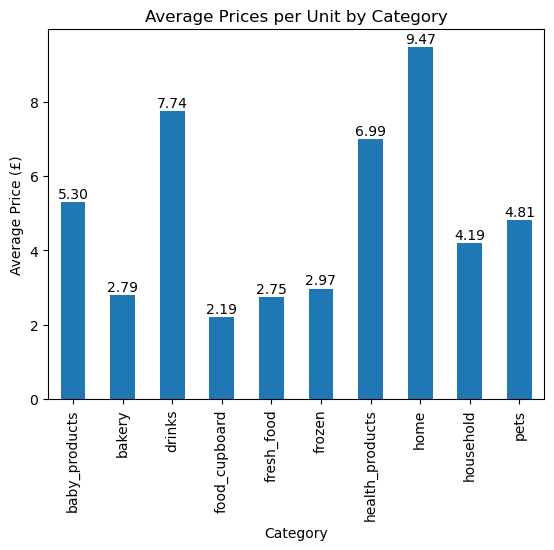

In [18]:
# Bar graph
avg_prices_tesco = df_tesco.groupby("category")["prices_pounds"].mean()
ax_tesco = avg_prices_tesco.plot(kind = "bar")
plt.title("Average Prices per Unit by Category")
plt.xlabel("Category")
plt.ylabel("Average Price (£)")

# Annotating the bars with values
for i, v in enumerate(avg_prices_tesco):
    ax_tesco.text(i, v + 0.03, f'{v:.2f}', ha = 'center', va = 'bottom')

plt.show()

The average price for `home` is significantly higher than for any other category followed by `bakery`

### Histogram for distribution of prices for a particular product category

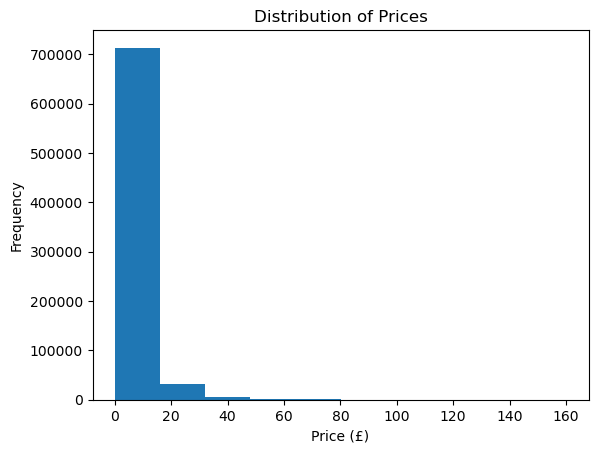

In [19]:
# Histogram
plt.hist(df_tesco["prices_pounds"], bins = 10)
plt.title("Distribution of Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()

From the above histogram -
* The price of most products in this category falls between £5 and £17.
* There are a few outliers that are more expensive than £17.
* The distribution is positively skewed, meaning there are more products towards the lower end of the price range.

### Line graph for price trends over time

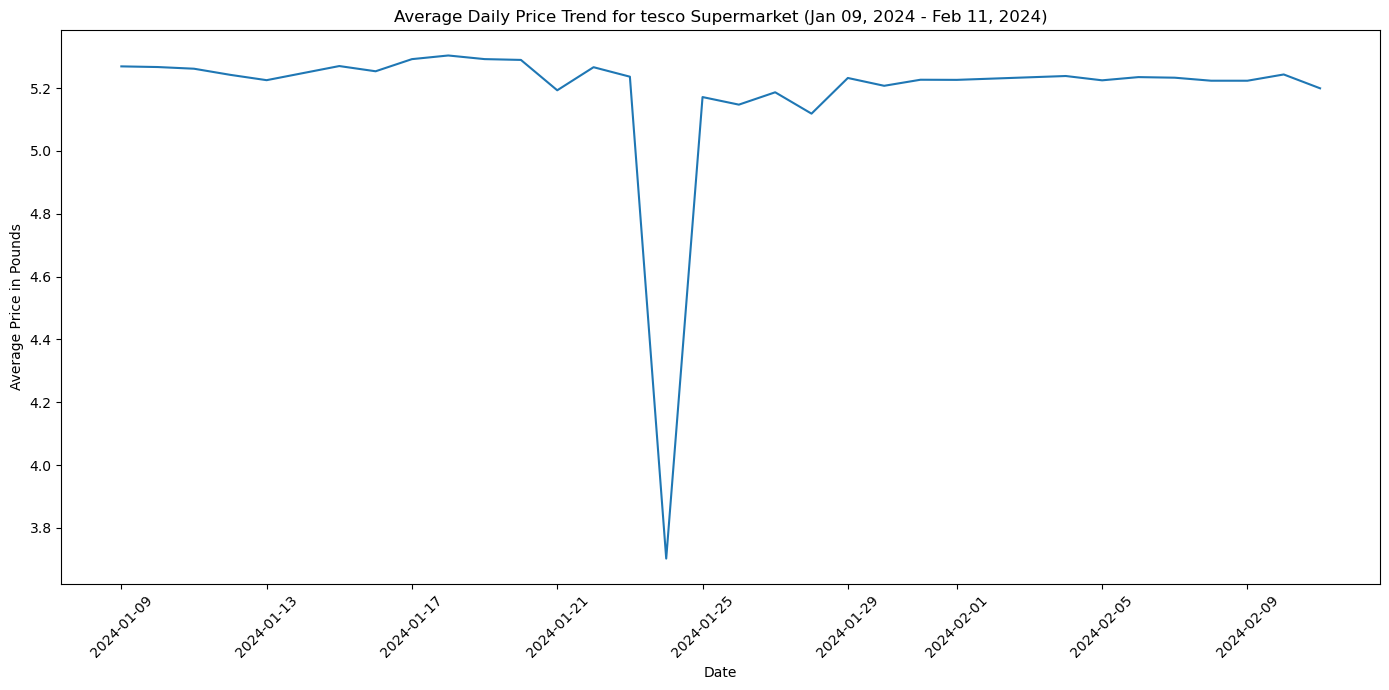

In [20]:
# Line graph
df_tesco['date'] = pd.to_datetime(df_tesco['date']) 
daily_price_trends_tesco = df_tesco.groupby(df_tesco['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize = (14, 7))
sns.lineplot(data = daily_price_trends_tesco, x = 'date', y = 'prices_pounds')
plt.title('Average Daily Price Trend for tesco Supermarket (Jan 09, 2024 - Feb 11, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
plt.xticks(rotation = 45)
plt.tight_layout() 
plt.show()

The observations for the `Tesco` supermarket are -
* There is a price increase from January 9th to January 13th, followed by a decrease until January 17th.
* The price remains relatively stable between January 17th and February 1st, with minor fluctuations.
* There is a slight price increase again from February 1st to February 9th, followed by a decrease on February 11th.

### Box plot for distribution of prices for each product category

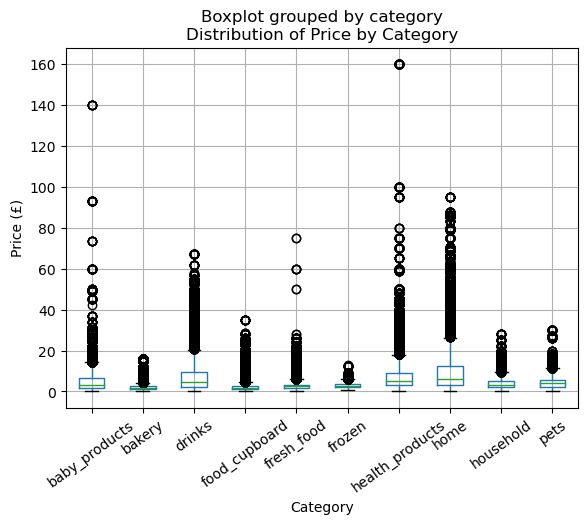

In [21]:

df_tesco.boxplot(column = "prices_pounds", by = "category")
plt.title("Distribution of Price by Category")
plt.xlabel("Category")
plt.ylabel("Price (£)")
plt.xticks(rotation = 36)
plt.show()

### Outliers: 
There are outliers in several categories, including `baby_products`, `drinks`, `health_products`, and `home`. These outliers represent prices that are significantly higher or lower than the rest of the data points in their respective categories.

### Pie chart for proportion of prices contributed by each product category

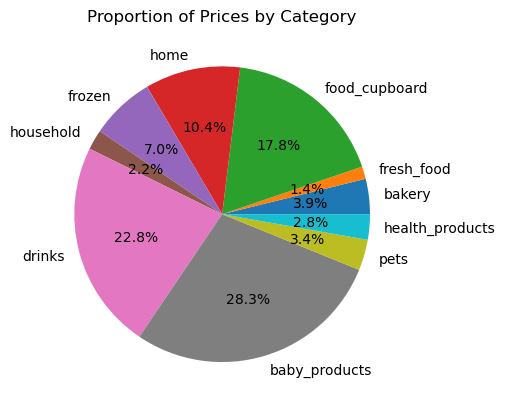

In [23]:
# Pie chart
plt.pie(df_tesco.groupby("category")["prices_pounds"].sum(), 
        labels = df_tesco["category"].unique(), 
        autopct = '%1.1f%%')

plt.title("Proportion of Prices by Category")

plt.show()

### From the pie chart -
* `baby_prodycts` and `drinks` have the highest number of products within the `Tesco` supermarket with a total of 28.3% and 22.8%

### Average Price Comparison: Own Brand vs. Non-Own Brand

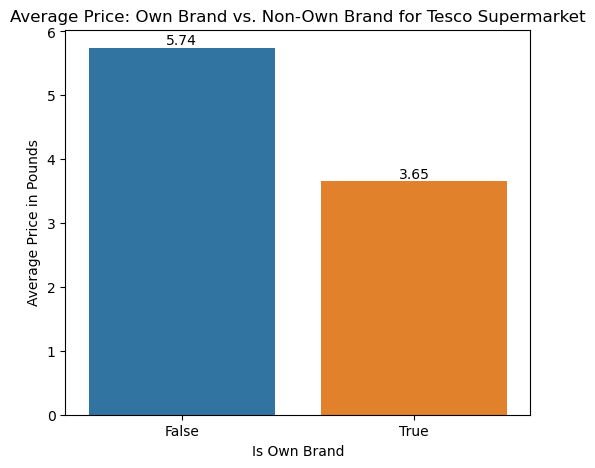

In [29]:
own_brand_prices_tesco = df_tesco.groupby('own_brand')['prices_pounds'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x = 'own_brand', 
            y = 'prices_pounds', 
            data=own_brand_prices_tesco)

plt.title('Average Price: Own Brand vs. Non-Own Brand for Tesco Supermarket')
plt.xlabel('Is Own Brand')
plt.ylabel('Average Price in Pounds')

# Displaying values on top of bars with a little gap
for index, row in own_brand_prices_tesco.iterrows():
    plt.text(index, row['prices_pounds'] + 0.05, round(row['prices_pounds'], 2), 
             color = 'black', 
             ha = "center")

plt.show()

# Correlation Matrix

In [30]:
# Extract only the 'date' column and 'prices_pounds' column
df_tesco_corr = df_tesco[['date', 'prices_pounds']]

# Compute correlation matrix
correlation_matrix_tesco = df_tesco_corr.corr()

print("Correlation Matrix:")
print(correlation_matrix_tesco)

Correlation Matrix:
                   date  prices_pounds
date           1.000000      -0.002096
prices_pounds -0.002096       1.000000


### Observations - 
* Based on the correlation coefficient, there is no meaningful linear relationship between the `date` and `prices_pounds` columns. In other words, the date of the observation does not have a significant impact on the prices in pounds.
* It's important to note that correlation coefficients only measure linear relationships, so there could still be other types of relationships (**nonlinear or time-dependent relationships**) that are not captured by this analysis.

## Different values present within `category`

In [31]:
tesco_category_value = df_tesco['category'].value_counts()
print("\nThe different values in category:\n{}".format(tesco_category_value))


The different values in category:
category
food_cupboard      186458
health_products    128187
home               117264
fresh_food         100581
drinks              90428
household           31513
frozen              28796
baby_products       28519
pets                22654
bakery              19102
Name: count, dtype: int64


In [33]:
tesco_ownBrand_value = df_tesco['own_brand'].value_counts()
print("\nNumber of items owned by Tesco and not owned by Tesco:\n{}".format(tesco_ownBrand_value))


Number of items owned by Tesco and not owned by Tesco:
own_brand
False    560377
True     193125
Name: count, dtype: int64
